# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

# 2. Read Data

In [2]:
data = pd.read_csv('../hepatitis_c_dataset.csv')

data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,label
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,False
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,False
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,False
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,False
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,True
604,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,True
605,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,True
606,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,True


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     608 non-null    int64  
 1   Sex     608 non-null    object 
 2   ALB     607 non-null    float64
 3   ALP     590 non-null    float64
 4   ALT     607 non-null    float64
 5   AST     608 non-null    float64
 6   BIL     608 non-null    float64
 7   CHE     608 non-null    float64
 8   CHOL    598 non-null    float64
 9   CREA    608 non-null    float64
 10  GGT     608 non-null    float64
 11  PROT    607 non-null    float64
 12  label   608 non-null    bool   
dtypes: bool(1), float64(10), int64(1), object(1)
memory usage: 57.7+ KB


### 3.1.2. Remove Missing Values

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.00000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,47.295533,41.831443,67.651890,25.666838,33.325086,11.09433,8.212337,5.402646,81.909107,36.835567,72.106357
std,9.863890,5.369272,25.148941,14.920906,32.357234,17.49429,2.151660,1.114920,50.669976,51.409352,4.857867
min,23.000000,23.000000,11.300000,0.900000,12.000000,1.80000,1.420000,1.430000,8.000000,4.500000,51.000000
25%,39.000000,39.000000,52.500000,16.325000,21.425000,5.30000,6.950000,4.630000,68.000000,15.450000,69.300000
50%,47.000000,41.950000,66.000000,22.500000,25.600000,7.15000,8.265000,5.310000,77.000000,22.650000,72.100000
75%,54.000000,45.175000,79.300000,31.750000,31.600000,11.00000,9.565000,6.087500,89.000000,36.200000,75.200000
max,77.000000,82.200000,416.600000,118.100000,324.000000,209.00000,16.410000,9.670000,1079.100000,650.900000,86.500000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'label'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [10]:
numerical_feature = list(feature_name)
numerical_feature.remove('Sex')
ordinal_feature = []
nominal_feature = ['Sex']

## ### 5.1. Ordinal Encoding

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [12]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [13]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [14]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [15]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [17]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [18]:
clf = MLPClassifier(
    hidden_layer_sizes=(50, 10, 10),
    activation='relu',
    learning_rate_init=0.5,
    max_iter=100,
    batch_size=X_train_scaled.shape[0],
    alpha=0,
    solver='sgd',
    momentum=0
)

## 6.2. Train Model

In [19]:
clf.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0, batch_size=465, hidden_layer_sizes=(50, 10, 10),
              learning_rate_init=0.5, max_iter=100, momentum=0, solver='sgd')

## 6.3. Loss Curve

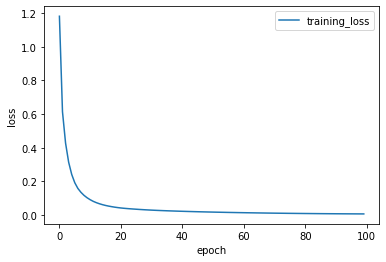

In [20]:
plt.plot(clf.loss_curve_, label='training_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## 6.4. Model's Weight & Bias

In [21]:
for coef in clf.coefs_:
    print(coef.shape)

(13, 50)
(50, 10)
(10, 10)
(10, 1)


In [22]:
for intercept in clf.intercepts_:
    print(intercept.shape)

(50,)
(10,)
(10,)
(1,)


# 7. Prediction

## 7.1. Training Set

In [23]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [24]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

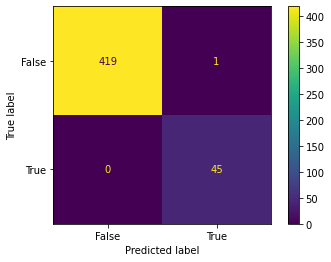

In [25]:
plot_confusion_matrix(clf, X_train_scaled, y_train)

### 8.1.2. Scoring

In [26]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [27]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
False,1.000000,0.997619,0.998808,420.000000
True,0.978261,1.000000,0.989011,45.000000
accuracy,0.997849,0.997849,0.997849,0.997849
macro avg,0.989130,0.998810,0.993910,465.000000
weighted avg,0.997896,0.997849,0.997860,465.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

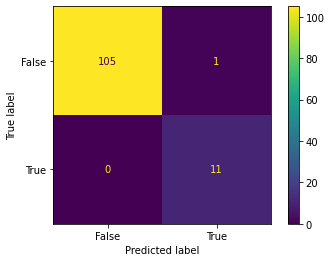

In [28]:
plot_confusion_matrix(clf, X_test_scaled, y_test)

### 8.2.2. Scoring

In [29]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [30]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
False,1.000000,0.990566,0.995261,106.000000
True,0.916667,1.000000,0.956522,11.000000
accuracy,0.991453,0.991453,0.991453,0.991453
macro avg,0.958333,0.995283,0.975891,117.000000
weighted avg,0.992165,0.991453,0.991619,117.000000


# 9. Save Model

In [31]:
import pickle

In [32]:
pickle.dump((clf, 
             one_hot_encoder, 
             scaler, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature), 
            open('hepatitis_c_model.pickle', 'wb'))